# Classification and Decision Trees

## Classification Metrics - Introduction (Confusion Matrices)

### What is Classification?

Classification is a task where the goal is to predict a category or class label. For example, predicting if an email is "spam" or "not spam".

### Confusion Matrix

Imagine you're a teacher grading a simple True/False quiz. You want to compare what the model predicted (answers) with the actual correct answers:

|                 | Predicted Positive  | Predicted Negative  |
| --------------- | ------------------- | ------------------- |
| Actual Positive | True Positive (TP)  | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)  |

### Example

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

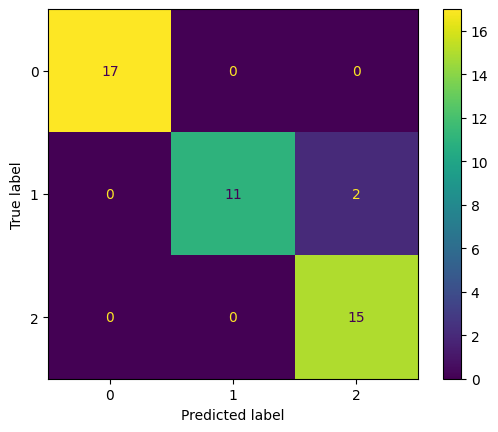

In [17]:
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [18]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
print(len(model.classes_))

3


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### 1. Accuracy - How many predictions are correct

Formula

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [21]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9555555555555556

### 2. Precision - Of the samples we predicted, how many were actually positive?

Formula


$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In [22]:
precision = precision_score(y_test, y_pred, average="macro")

precision

0.9607843137254902

### 3. Recall (Sensitivity) - Of all the actual positives, how many did the model correctly predict?

Formula


$$
\text{Recall} = \frac{TP}{TP + FN}
$$


In [23]:
recall = recall_score(y_test, y_pred, average="macro")

recall

0.9487179487179488

### 4. F1 Score - The balance between precision and recall

Formula

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [24]:
f1 = f1_score(y_test, y_pred, average="macro")

f1

0.9513888888888888

In [25]:
y_true = [0, 1, 2 ,2 ,2]
y_pred = [0, 0, 2, 2, 1]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average='macro')

f1 = f1_score(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.6
Precision: 0.5
Recall: 0.5555555555555555
F1: 0.48888888888888893


---

## Evaluating Logistic Regression Models

### ROC Curve and AUC

An ROC curve shows how well your model distinguishes between classes. AUC (Area Under Curve) measures overall performance.

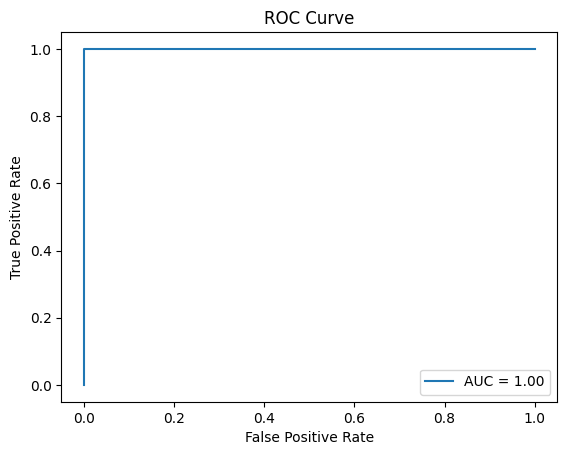

In [26]:

# Only use 2 classes for ROC
X, y = load_iris(return_X_y=True)
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

---

### Class Imbalance Problems

If one class appears more often, the model might get lazy and predict that class all the time.

**Fixes**:


- Resample the dataset
- Use metrics like F1-score instead of accuracy

---

### Logistic Regression Model Comparisons

Try multiple models with:

- Different features
- Regularization (L1, L2)
- Different train/test splits

Compare using metrics: accuracy, precision, recall, F1-score.

---



## Decision Trees

Decision Trees split the data based on conditions like a flowchart.

**Analogy**: Playing 20 Questions! Each question narrows the possibilities.

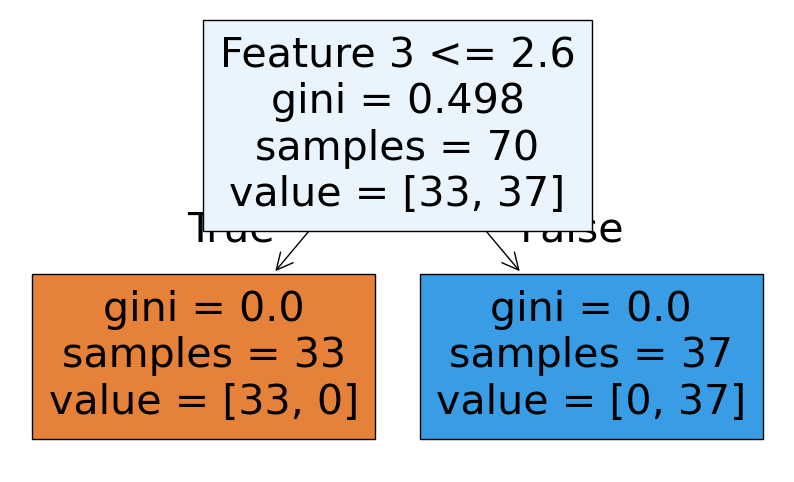

In [27]:
# Example fixed feature names depending on X_train shape
feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

---

## Entropy and Information Gain

### Entropy

Entropy measures "uncertainty".

- 0 means pure (all one class)
- Higher means more mixed

Formula: \(H = -\sum p(x) \log_2 p(x)\)

### Python Equivalent:

In [28]:
probs = [0.5, 0.5]
entropy = -sum(p * np.log2(p) for p in probs)

### Information Gain

Tells us how much entropy decreased after a split.

\(IG = H(parent) - \text{weighted avg}(H(children))\)

---

## ID3 Algorithm and Tree Building

ID3 builds trees by maximizing Information Gain at each step.

---

## Building Trees Using scikit-learn

In [29]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


---

## Hyperparameter Tuning and Pruning

### Common Hyperparameters

- max\_depth
- min\_samples\_split
- criterion ("gini" or "entropy")

### Pruning

Pruning avoids overfitting by limiting tree growth.

---

## Regression with CART Trees

CART = Classification and Regression Trees Used for predicting numbers instead of labels.

In [30]:
reg_model = DecisionTreeRegressor(max_depth=3)
reg_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


---

## Exercises

1. Train a decision tree classifier on the Iris dataset.
2. Calculate entropy for a dataset with 70% positive and 30% negative.
3. Plot ROC curves for different logistic models.
4. Use max\_depth=1 and max\_depth=5 to compare trees.
5. Train a DecisionTreeRegressor and visualize its splits.

---

## Summary

- Confusion matrices and ROC/AUC are crucial metrics.
- Decision trees work by splitting data with questions.
- Entropy and Information Gain help build smarter trees.
- Logistic regression can be evaluated with statistical tools.
- Tuning and pruning trees prevent overfitting.